- competition/dataset : [https://www.kaggle.com/c/costa-rican-household-poverty-prediction](https://www.kaggle.com/c/costa-rican-household-poverty-prediction)
- date : 2021/02/03
- original : [https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough](https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough)

## A Complete Introduction and Walkthrough

**✏ 필사 1회** 

### 1. Costa Rican Household Poverty Level Prediction
또다른 Kaggle 챌린지에 온 것을 환영합니다! 코스타리칸 가정 빈곤 수준 예측 대회의 목적은 개인적인 특징과 가정의 특징을 사용하여 가정의 빈곤 수준을 예측할 수 있는 머신러닝 모델을 개발하는 것입니다. "좋은 일을 위한 데이터 사이언스" 프로젝트는 사람들이 광고를 클릭하게 하는 것 보다 사회에 더 큰 이익을 주는 일에 우리의 기술을 사용할 수 있는 기회를 줍니다.  

이 노트북에서는 완전한 머신러닝 솔루션을 살펴볼 것입니다.
1. 문제 소개
2. 데이터 셋에 대한 탐색적 데이터 분석 수행
3. feature engineering
4. 여러 머신러닝 모델 시험
5. 모델 선택
6. 모델 최적화
7. 모델의 결과 검사 및 결론 도출  

비록 리더보드에서 높은 점수를 얻지 못할 수도 있지만, 이후 머신러닝 프로젝트를 위한 단단한 기초를 제공하기 위한 교육 도구로 사용될 수 있습니다. Kaggle 프로젝트들은 머신러닝에 대해 많은 것을 가르쳐줄 수 있지만, 리더보드의 상위에 오르기 위한 대부분의 전략은 모범 사례는 아닙니다. 따라서 1등은 아니지만 좋은 머신러닝 솔루션을 세워보도록 하겠습니다. Kaggle 프로젝트는 대회이기는 하지만, 대회로 가장한 "머신러닝 교육"으로 가장 잘 묘사된다고 생각합니다.  

이 작업 후 부가적인 것을 원한다면, 이 문제에 대한 [자동화된 feature engineering](https://www.kaggle.com/willkoehrsen/featuretools-for-good)과 [featuretool](https://docs.featuretools.com/#minute-quick-start)을 사용하는 커널을 포함한 추가적인 작업이 있습니다 (리더보드 점수가 조금 더 높습니다).

#### 1-1. Problem and Data Explanation
이 대회의 데이터는 ```train.csv```와 ```test.csv``` 파일로 제공됩니다. 트레이닝 셋에는 9557개의 행과 143개의 열이 있으며, 테스트 셋에는 23856개의 행과 142개의 열이 있습니다. 각 행은 **개인**을 의미하고, 각 컬럼은 **개인의 고유한 특징 혹은 개인의 가정에 대한 특징**에 대한 변수들입니다. 트레이닝 셋에는 추가적으로 ```Target```이라는 변수가 있으며, 이것은 빈곤 수준을 1-4 사이로 나타내고 이 대회의 레이블입니다. 1이 가장 빈곤함을 의미하는 값입니다.  

이것은 **지도학습 다중 분류 머신러닝 모델 문제(supervised multi-class classification machin learning problem)**입니다.  
* **Supervised**: 트레이닝 데이터에 레이블이 제공됨
* **Multi-class classification**: 레이블은 4개의 클래스가 있는 이산형 값임

##### Objective
목표는 **가정 수준**에 따른 빈곤을 예측하는 것입니다. 고유한 변수들을 가지고 있는 개인 수준의 데이터와 그들의 가정에 대한 정보를 제공받습니다. 작업을 위한 데이터 셋을 만들기 위해 각 가정별로 개인 데이터를 집계하는 작업이 필요할 것입니다. 또한, 테스트 셋의 각 개인별로 예측을 해야하지만, "가장만 점수에 반영된다"는 의미는 가구 단위로 빈곤을 예측하고자 한다는 것을 의미합니다.  

**중요한 점**: 트레이닝 데이터에서 가정의 모든 구성원은 같은 레이블을 가지며, 같은 가정인데 다른 레이블을 갖는 개인은 오류입니다. 이러한 경우에, 각 가정의 가장의 레이블을 사용하며, ```parentesco1 == 1.0```인 행을 통해 알 수 있습니다. 이 부분을 해결하는 방법에 대해 노트북에서 다룹니다. (자세한 사항은 [competition main discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 참고하세요)  

```Target```의 값은 빈곤 수준에 따라 다음과 같이 나타납니다:
>1 = 매우 빈곤 (extreme poverty)  
2 = 빈곤 (moderate poverty)  
3 = 취약한 가정 (vulnerable households)  
4 = 취약하지 않은 가정 (non vulnerable households)  

143개의 컬럼 전체에 대한 설명은 [competition documentation](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)을 참고할 수 있습니다.  
* **Id**: 각 개인별 고유 식별자. 우리가 사용할 변수는 아님
* **idhogar**: 각 가정별 고유 식별자. 변수는 아니지만 개인을 가정별로 그룹화할 때 사용
* **parentesco1**: 가장인지 여부
* **Target**: 레이블, 가족 구성원은 모두 같은 값이어야 함  

모델을 만들 때, 각 가정의 레이블을 가장의 빈곤 수준을 기준으로 하여 훈련할 것입니다. 원 데이터는 가정과 개인의 특징을 모두 가지고 있으며, 개인 데이터는 각 가정별로 집계할 방법을 찾아야 합니다. 개인 데이터의 일부는 가장이 없는 가정에 속하는데, 이는 훈련에 사용할 수 없는 데이터입니다. 이러한 데이터의 문제는 실제 데이터의 전형적인 문제이므로 데이터 사이언스 일을 하면서 만날 수 있는 데이터 셋에 대한 대비가 매우 중요합니다.

##### Metric
궁극적으로 가정의 빈곤 수준을 숫자값으로 예측할 수 있는 우리는 머신러닝 모델을 구축하고자 합니다. 우리의 예측은 **Macro F1 Score**에 의해 평가될 것입니다. 아마 이진 분류 문제에 적합한 기본적인 [F1 score](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)에 익숙할 것입니다:  

$$F_{1} = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$  

다중 분류 문제에서는 각 클래스의 F1 score를 평균내야 합니다. macro F1 score는 레이블 불균형의 경우를 고려하지 않고 각 클래스별 F1 score를 평균냅니다:  

$$Macro F1 = \frac{F1 Class 1 + F1 Class 2 + F1 Class 3 + F1 Class 4}{4}$$

다시 말해서, 각 레이블의 발생 횟수는 macro를 사용할 때는 고려하지 않습니다 ('weighted' score를 사용할 때만 고려). 성능을 평가하기 위해서는 다음 코드를 사용할 수 있습니다:  
```python
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average='macro'
```  

이번 문제에서는 레이블이 불균형하므로 평가 metric에 macro 평균을 사용하는 것이 약간 이상하나, 제작자의 결정이므로 우리가 바꿀 것은 없습니다.

#### 1-2. Roadmap
최종 목표는 가정의 빈곤 수준을 예측하는 머신러닝 모델입니다. 그러나 모델링에 열중하기에 앞서, 문제와 데이터를 이해하는 것이 중요합니다. 따라서, 가장 좋은 모델을 선택하기 전 여러 모델들을 평가하고, 모델을 구축한 후 예측을 연구하려 합니다. 우리의 로드맵은 다음과 같습니다:  
1. 문제 이해
2. 탐색적 데이터 분석
3. 머신러닝에 적합한 데이터셋을 만들기 위한 feature engineering
4. 기본 머신러닝 모델들 비교
5. 머신러닝 모델 정교화
6. 선택한 모델 최적화
7. 문제의 맥락에서 모델의 예측 연구
8. 결론 도출 및 다음 단계 제시

위 단계들은 한 번에 하나씩 진행하지만 때로는 이전 단계로 돌아가 우리의 결정을 재검토할 수 있습니다. 일반적으로 데이터 사이언스는 지속적으로 지난 결정들을 평가하고 향상시켜야 하기 때문에 선형적인 작업이 아닙니다. 특히, feature engineering, 모델링, 최적화와 같은 작업들은 한번에 알 수 없기 때문에 자주 반복하는 단계들입니다.

### 2. Getting Started
우리가 문제에 대해 잘 이해하고 있기 때문에, 탐색적 데이터 분석와 feature engineering을 진행할 것입니다. EDA의 경우, feature engineering, modeling에 사용될 수 있는 이상값, 트렌드, 상관관계, 패턴 등을 살펴봅니다. 우리는 반드시 데이터를 정량적으로(통계), 그리고 시각적으로(그래프) 조사해야 합니다.  

데이터와 잠재적으로 유용한 관계들을 잘 파악하면 feature engineering을 수행하고 기본적인 모델들을 구축할 수 있습니다. 이것은 리더보드 정상에 오르지는 못하지만, 단단한 기초를 제공할 것입니다.  

#### 2-1. Imports
친숙한 데이터 사이언스 라이브러리들을 사용합니다: ```pandas```, ```numpy```, ```matplotlib```, ```seaborn```, ```slkearn```

In [42]:
# 데이터 조작
import pandas as pd
import numpy as np

# 시각화 
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 기본값 설정
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 12
plt.rcParams['patch.edgecolor'] = 'k'

#### 2-2. Read in Data and Look at Summary Information

In [43]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


정수형 컬럼 130개, 실수형 컬럼 8개, 문자형 컬럼 5개가 있습니다. 정수형 컬럼의 경우 아마 boolean 변수이거나 순서형 변수일 것입니다. 문자형 변수는 머신러닝 모델에 직접 입력할 수 없기 때문에 문제가 될 수 있습니다.  

테스트 데이터는 트레이닝 데이터에 비해 얼마나 많은 행을 가지고 있는지 훑어봅시다. 여기에는 Target이 없기 때문에 컬럼 수는 하나 적을 것입니다.

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


##### Integer Columns
정수형 컬럼들의 고유한 값에 대한 분포를 살펴봅시다. 각 컬럼마다 고유한 값의 수를 세고, bar plot으로 결과를 살펴볼 것입니다.

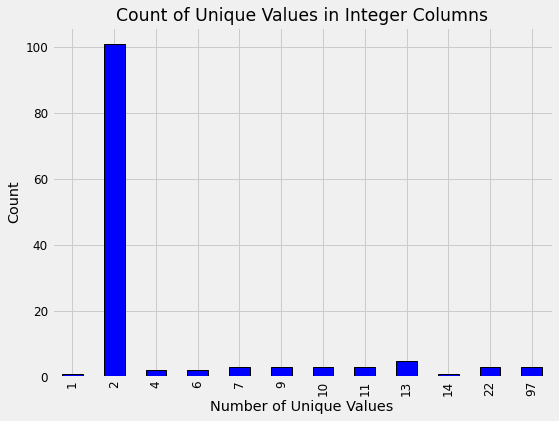

In [46]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8, 6), edgecolor='k', linewidth=1)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')
plt.show()

두 가지 고유 값을 갖는 컬럼들은 boolean을 의미합니다. 많은 경우, 이 boolean 정보는 이미 가정 수준에 있습니다. 예를 들어, ```refrig``` 컬럼은 가정에 냉장고가 있는지 없는지를 의미합니다. 가정 수준에 있는 boolean 컬럼에서 변수를 만들 때가 되어도 집계할 필요가 없을 것입니다. 그러나 개별 수준에 있는 boolean 컬럼들은 집계가 필요합니다.

##### Float Columns
연속형 변수인 실수형 컬럼의 분포를 나타내기 위해 빠르게 distribution plot을 만들 수 있습니다. ```OrderedDict```를 사용하여 빈곤 수준을 색깔로 매핑하겠습니다.  

다음 그래프는 ```Target```의 값에 따라 색을 다르게 한 ```float``` 컬럼의 분포를 나타냅니다. 이 플롯에서 가정의 빈곤 수준에 다라 다양한 분포의 차이가 생김을 볼 수 있습니다.

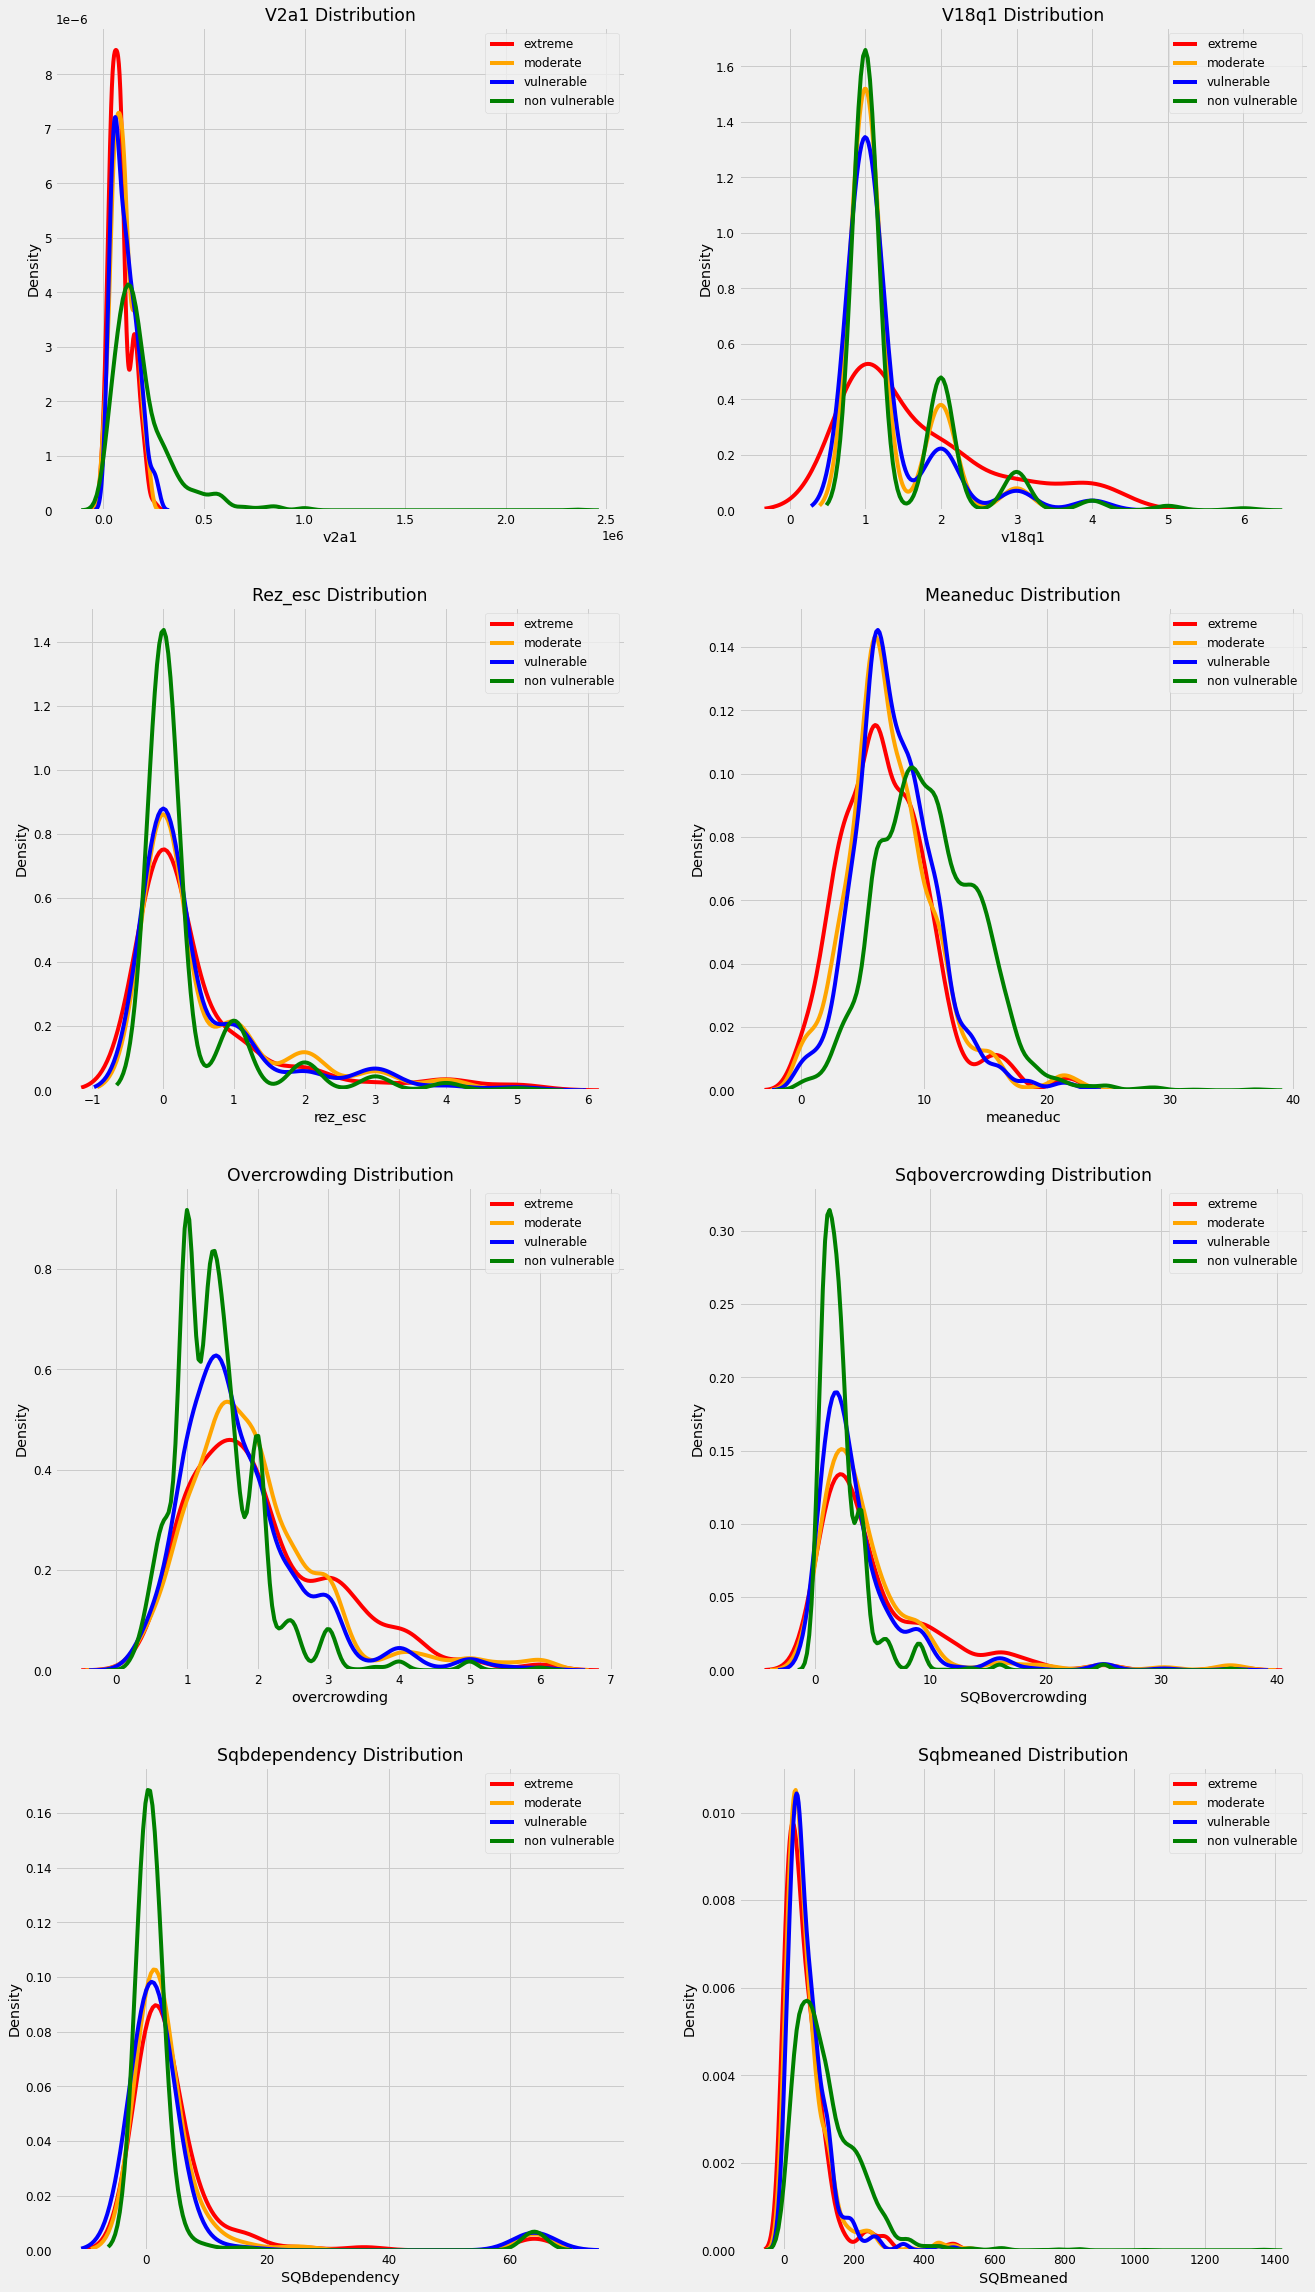

In [47]:
from collections import OrderedDict

plt.figure(figsize=(20, 16))

# Color mapping
colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

# 실수형 컬럼 반복
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    # 빈곤 수준 반복
    for poverty_level, color in colors.items():
        # 각 빈곤 수준별로 시각화
        sns.kdeplot(
            train.loc[train['Target'] == poverty_level, col].dropna(),
            ax=ax, color=color, label=poverty_mapping[poverty_level]
        )
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.legend()

plt.subplots_adjust(top=2)
plt.show()

뒤에서 이 변수들과 ```Target```의 상관관계를 계산하겠지만, 이 플롯들은 모델과 가장 관계있는 변수들이 어떤 것인지 파악할 수 있습니다. 예를들어 ```meaneduc```의 경우, 가정 내 성인의 평균 교육을 나타내는 것은 빈곤 수준과 관련이 있는 것으로 보입니다. 평균 성인 교육에 대한 값이 높을수록 빈곤 수준은 낮습니다. 

##### Object Columns
이제 남은 컬럼 타입은 ```object```입니다.

In [48]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


```Id```와 ```idhogar```는 문자형이 확실합니다. 그러나 나머지 컬럼들은 문자와 숫자가 혼합되어 있는 것을 볼 수 있으며, 머신러닝을 진행하기 전에 처리해야 합니다.
* ```dependency```: 의존률, (19세 미만 혹은 65세 이상 가족 구성원 수)/(19세 이상 65세 미만 가족 구성원 수)
* ```edjefe```: 남성 가장의 교육 연수, yes=1, no=0
* ```edjefa```: 여성 가장의 교육 연수, yes=1, no=0

위의 이슈가 깔끔하게 해결되는 설명입니다. 세 가지 변수의 경우, **yes=1**, **no=0**입니다.

In [49]:
mapping = {'yes':1, 'no':0}

# 트레이닝 데이터와 테스트 데이터에 적용
for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


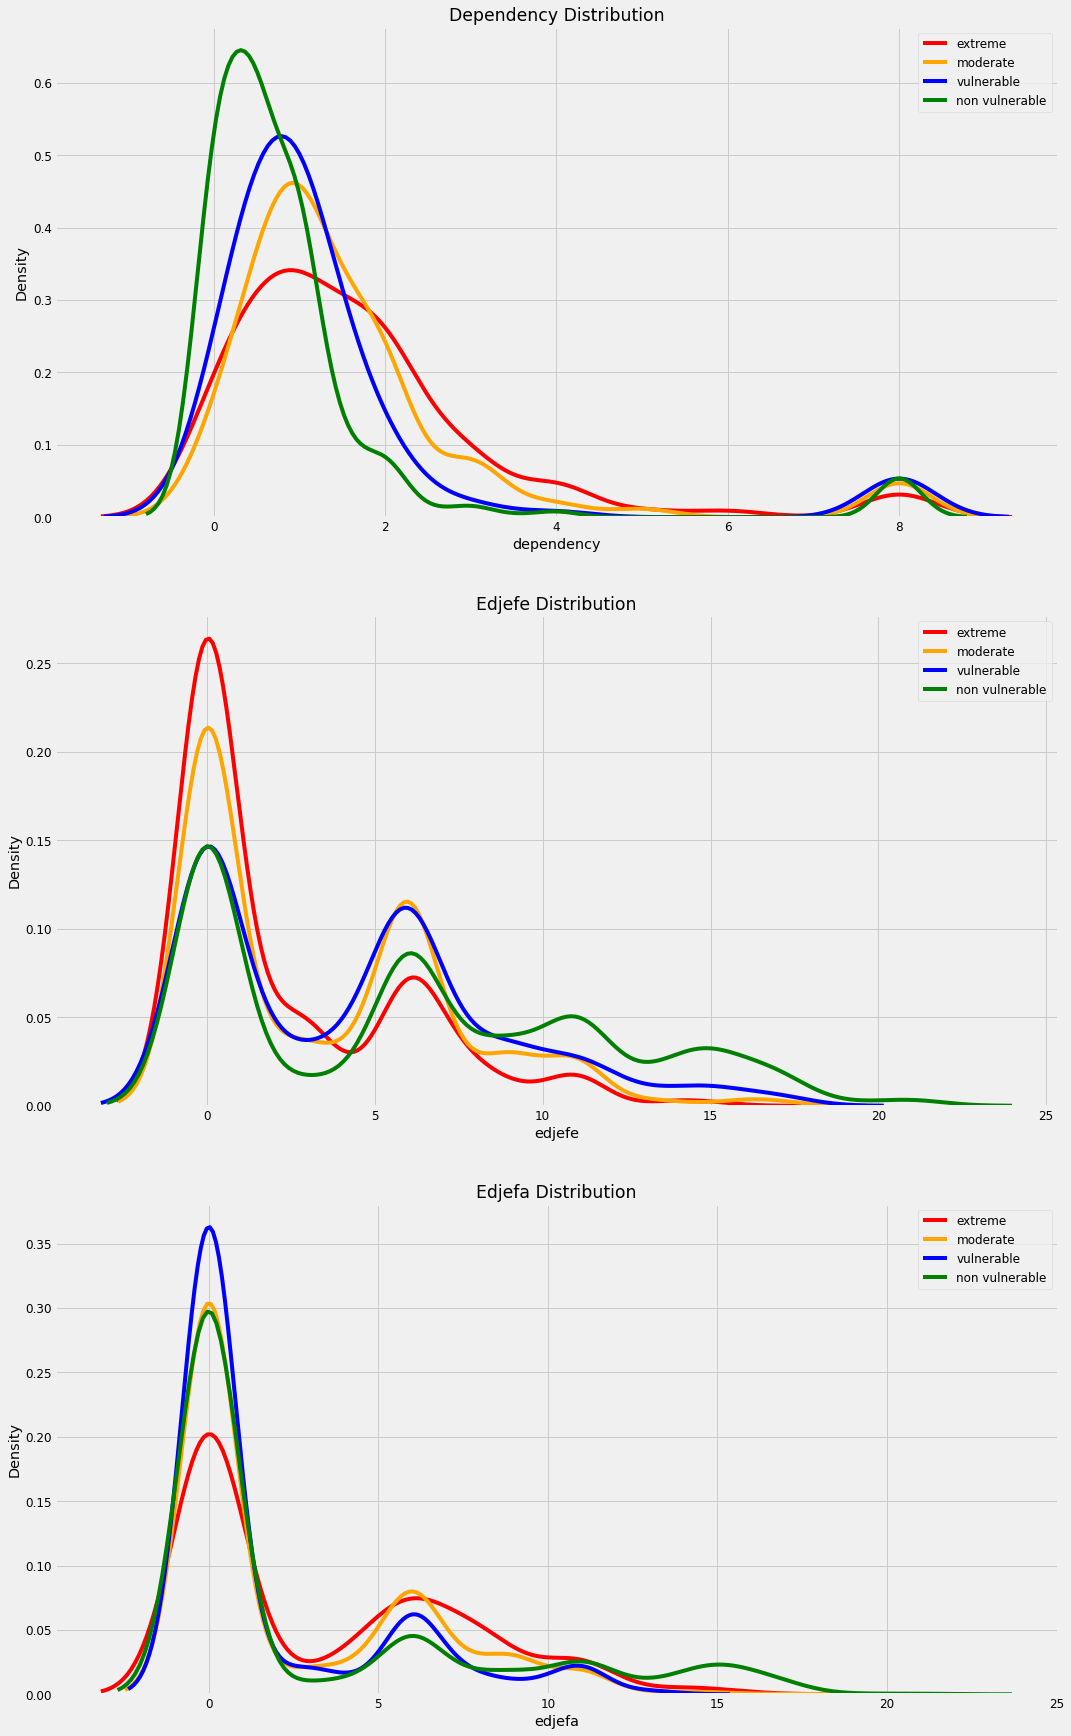

In [50]:
plt.figure(figsize=(16, 12))

# 실수형 컬럼 반복
for i, col in enumerate(['dependency', 'edjefe', 'edjefa']):
    ax = plt.subplot(3, 1, i+1)
    # 빈곤 수준 반복
    for poverty_level, color in colors.items():
        sns.kdeplot(
            train.loc[train['Target'] == poverty_level, col].dropna(),
            ax=ax, color=color, label=poverty_mapping[poverty_level]
        )

    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.legend()

plt.subplots_adjust(top=2)
plt.show()

In [51]:
test['Target'] = np.nan
data = train.append(test, ignore_index=True)

#### 2-3. Exploring Label Distibution
레이블의 분포를 살펴봄으로써 문제가 얼마나 불균형한지 알 수 있습니다. 4개의 빈곤 수준을 나타내는 4개의 숫자 레벨이 있습니다. 제대로된 레이블을 살펴보기 위해 ```parentesco1 == 1```인 컬럼만 취합합니다.  

다음의 bar plot은 트레이닝 셋의 레이블의 분포를 나타냅니다.

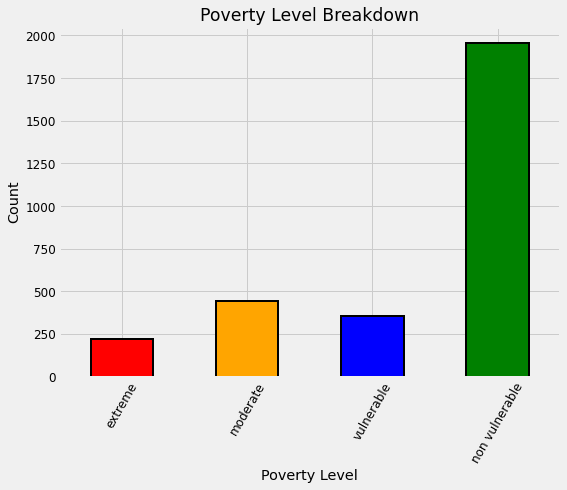

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

In [52]:
heads = data.loc[data['parentesco1'] == 1].copy()

# 트레이닝 셋의 레이블
train_labels = data.loc[(data['Target'].notnull())&(data['parentesco1'] == 1), ['Target', 'idhogar']]

# target에 value_counts
label_counts = train_labels['Target'].value_counts().sort_index()

# 각 레이블에 대한 bar plot
label_counts.plot.bar(
    figsize=(8, 6), color=colors.values(), edgecolor='k', linewidth=2
)

# formatting
plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation=60)
plt.title('Poverty Level Breakdown')
plt.show()

label_counts

불균형한 클래스의 문제에 대해 보았으며, 제작자가 weighted F1이 아닌 macro F1을 메트릭으로 선택했는지 매우 궁금합니다. 다른 범주에 비해 non vulnerable로 분류된 가정이 훨씬 많습니다. extreme 빈곤 클래스는 가장 적은 양에 속합니다.  

불균형한 분류의 문제는 머신러닝 모델이 적은 양을 가진 클래스를 분류하기 힘들어 할 수 있다는 점입니다. 이러한 불균형한 클래스를 해결할 수 있는 방법은 오버샘플링입니다.

#### 2-4. Addressing Wrong Labels
실제 데이터 셋과 마찬가지고 Costa Rican Poverty 데이터도 문제가 있습니다, 일반적으로 데이터 사이언스 프로젝트의 80%는 데이터 정제와 이상값/오류를 수정하는 데 사용됩니다. 이러한 값들은 사람이 잘못 입력하거나, 측정의 오류이거나, 혹은 정확한 값이지만 눈에 띄는 극단값일 수 있습니다. 여기서는 몇 개의 레이블들은 한 가정의 개인 값들이 다른 소득 수준을 가지기 때문에 문제가 있습니다. 왜 그런지는 알 수 없으나 가장을 정확한 라벨로 분류하기로 언급했었습니다.  

이 정보는 작업을 훨씬 쉽게 해주지만, 현실에서는 왜 레이블이 잘못되었는지, 그리고 스스로 그 문제를 어떻게 해결해야 할 지 알아내야 할 것입니다. 이번 섹션에서는 해당 레이블이 완전히 필요한게 아니더라도 레이블의 문제들을 해결할 예정입니다.

##### Identify Errors
먼저 오류를 찾고 해결할 것입니다. 가족 구성원 간 다른 레이블을 갖는 가정을 찾기 위해 가정별로 데이터를 묶고, ```Target```값이 고유한지 확인합니다.

In [53]:
# 그룹화 및 고유 값 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# target이 일치하지 않는 가정
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [54]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


주최자가 가장의 레이블이 옳은 값이라고 말했으므로, 위의 경우 올바른 레이블은 **3**입니다. 뒤에서 모든 구성원들에게 올바른 빈곤 수준 값을 입력하여 고칠 것입니다. 현실에서는 스스로 이 문제를 해결할 방법에 대해 결정해야 합니다.

##### Families without Heads of Household
가장이 없는 가정의 경우 어떻게 해야 할까요? 만약 그 가정의 label값이 서로 다르다면?

In [55]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# 가장이 없는 가정
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [56]:
# 가장이 없는 가정 중 레이블 값이 다른 가정
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


다행히 가정이 없는 가정 중 레이블 값이 다른 가정은 없습니다. 주최 측에 따르면, 가정에 가장이 없는 경우 올바른 레이블은 없는 것입니다. 따라서 실제 트레이닝 시 가장이 없는 가정은 사용하지 않을 것입니다.

##### Correct Errors
가장이 있고 구성원의 빈곤 수준이 다른 가정의 레이블을 수정할 것입니다.

In [57]:
# 각 가정마다 반복
for household in not_equal.index:
    # 올바른 레이블
    true_target = int(train[(train['idhogar'] == household)&(train['parentesco1'] == 1.0)]['Target'])
    
    # 가족 구성원의 레이블 수정
    train.loc[train['idhogar'] == household, 'Target'] = true_target

# 가정별로 그룹화 및 고유 값 개수 파악
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# target이 동일하지 않은 가정
not_equal = all_equal[all_equal != True]
print('There are {} households where family member do not all have same target.'.format(len(not_equal)))

There are 0 households where family member do not all have same target.


#### 2-5. Missing Variables
탐색적 데이터 분석의 가장 중요한 단계중 하나는 바로 결측값을 발견하고 어떻게 처리할지 결정하는 것입니다. 결측값은 머신러닝 모델을 사용하기 전에 처리해야 하고, 어떻게 채우는 것이 가장 좋은 전략일지에 대해 고민해야 합니다.  

먼저, 각 컬럼의 결측값의 비율을 살펴보겠습니다.

In [58]:
# 각 컬럼의 결측값 개수
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})

# 결측값 비율
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending=False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


**v18q1**: 태블릿의 개수  
이 변수는 가정에 관한 변수이기 대문에 가정 수준에서 살펴보아야 합니다. 따라서 가장에 해당하는 행만 선택하겠습니다.

##### Function to Plot Value Counts

In [59]:
# value counts plot 함수
def plot_value_counts(df, col, heads_only=False):
    # 가장 선택
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
    
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot.bar(color='blue', edgecolor='k', linewidth=2)
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.title(f'{col} Value Counts')
    plt.show()

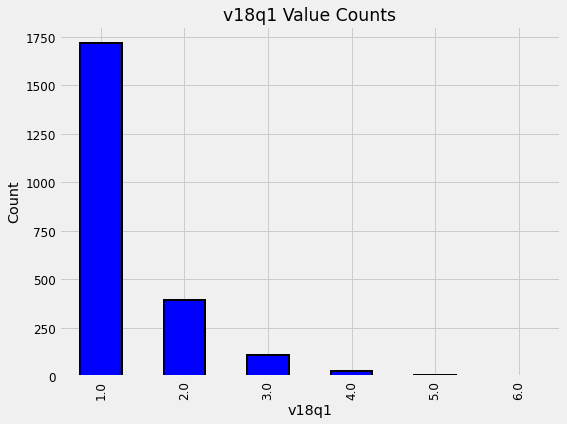

In [60]:
plot_value_counts(heads, 'v18q1')

```v18q```의 값으로 ```groupby```를 수행할 수 있습니다(태블릿이 있으면 1, 없으면 0). 

In [61]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

```v18q1```이 ```nan```인 모든 가족들은 태블릿이 없으므로, 결측값을 0으로 대체할 수 있습니다.

In [62]:
data['v18q1'].fillna(0, inplace=True)

**v2a1**: 월세  

다음은 ```v2a1``` 컬럼의 결측값을 살펴보겠습니다.  

월세의 결측값을 살펴보기 위해 집의 소유/렌탈 현황을 알려주는 ```tipovivi_``` 컬럼의 분포를 살펴볼 수 있습니다.

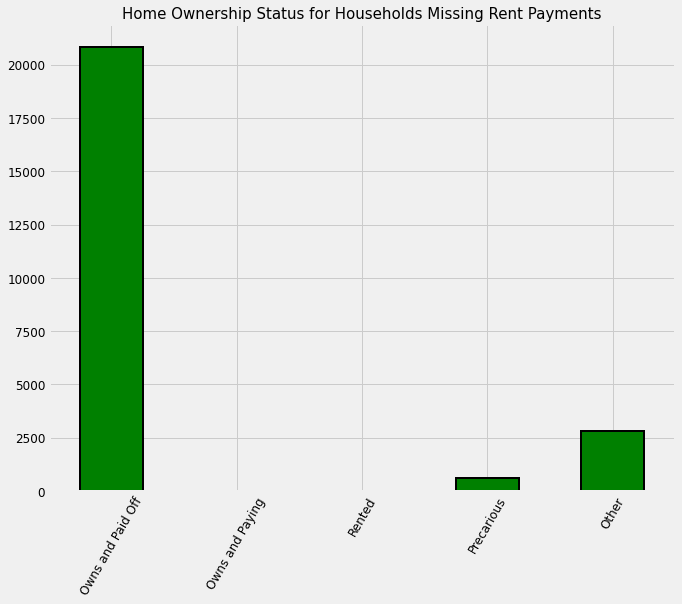

In [63]:
# 소유 현황을 알려주는 변수
own_variables = [x for x in data if x.startswith('tipo')]

# 월세가 결측값인 데이터에 대한 소유 현황
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(
    figsize=(10, 8), color='green', edgecolor='k', linewidth=2
)
plt.xticks([0, 1, 2, 3, 4], 
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
           rotation=60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size=15)
plt.show()

소유 현황에 관한 변수에 대한 의미는 다음과 같습니다:
>tipovivi1, =1 own and fully paid house (완전 자가)  
tipovivi2, =1 own, paying in installments (자가, 대출)  
tipovivi3, =1 rented (렌트)  
tipovivi4, =1 precarious (위험)
tipovivi5, =1 other (기타)  

결측값의 대부분이 자가이며 금액을 지불하지 않습니다. 이 결측값의 경우 지불 금액을 0으로 설정할 수 있습니다. 나머지 경우에는 결측값임을 나타내는 플래그 열을 추가합니다.

In [64]:
# 자가인 가정의 월세 = 0
data.loc[data['tipovivi1'] == 1, 'v2a1'] = 0

# 월세가 결측값임을 나타내는 컬럼
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

**rez_esc**: 학교에서 뒤처진 햇수  

결측값 비율이 높았던 마지막 컬럼은 ```rez_esc```입니다. 결측값이 있는 가정의 경우 현재 학교에 다닐 아이가 없을 가능성이 있습니다. 결측값을 age 컬럼과 함께 비교해봅시다.

In [65]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [66]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

이 대회의 discussion을 읽어보면, 이 변수는 7~19세의 개인에 대해서만 정의되어 있다는 것을 알 수 있습니다. 따라서 19세가 넘고 결측값인 경우, 혹은 7세 미만이고 결측값인 경우에는 0으로 설정할 수 있습니다. 이외의 경우에는 플래그를 추가합니다.

In [67]:
data.loc[((data['age'] > 19)|(data['age'] < 7))&(data['rez_esc'].isnull()), 'rez_esc'] = 0

data['rez_esc-missing'] = data['rez_esc'].isnull()

```rez_esc```에는 이상값도 있습니다. discussion에서는 최댓값이 5라고 언급했으므로, 5를 넘는 값은 5로 설정합니다.

In [68]:
data['rez_esc'].value_counts()

0.0     30894
1.0       728
2.0       336
3.0       174
4.0        80
5.0        39
99.0        1
Name: rez_esc, dtype: int64

In [69]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

#### 2-6. Plot Two Categorical Variables
두 범주형 변수들이 서로 어떻게 상호작용하는지 볼 수 있는 산점도, faceted 막대 그래프, 박스플롯 등의 시각화 옵션들이 있습니다. 그러나 우리는 다음과 같은 함수를 사용하여 x축의 값별로 y축 값에 대한 비율을 점의 크기로 표현한 산점도를 만들 것입니다.

In [70]:
def plot_categoricals(x, y, data, annotate=True):
    '''
    두 범주형 변수의 수에 대한 플롯
    크기는 각 그룹의 행 수
    비율은 지정된 y값에 대한 백분율
    '''
    # Raw counts
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={x:'raw_count'})
    
    # x와 y에 대한 각 그룹 수 계산
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))
    
    # 컬럼명 변경 및 인덱스 재설정
    counts = counts.rename(columns={x:'normalized_count'}).reset_index()
    counts['percent'] = 100*counts['normalized_count']
    
    # raw count 추가
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize=(14, 10))
    # percent별로 크기가 다른 산점도
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
               s=100*np.sqrt(counts['raw_count']), marker='o',
               alpha=0.6, linewidth=1.5)
    
    if annotate:
        for i, row in counts.iterrows():
            plt.annotate(xy=(row[x] - 1/counts[x].nunique(),
                             row[y] - 0.15/counts[y].nunique()),
                         color='navy', text=f"{round(row['percent'], 1)}%")
    
    # 눈금 표시 설정
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # 최댓값과 최솟값을 제곱근값으로 변환
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 범례
    msizes = list(range(sqr_min, sqr_max, int((sqr_max-sqr_min)/5)))
    markers = []
    for size in msizes:
        markers.append(plt.scatter(
            [], [], s=100*size,
            label=f'{int(round(np.square(size)/100)*100)}',
            color='lightgreen', alpha=0.6, edgecolor='k', linewidth=1.5
        ))
    
    plt.legend(handles=markers, title='Counts', labelspacing=3, handletextpad=2,
              fontsize=16, loc=(1.0, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy=(0, 1), xycoords='figure points', size=18)
    
    # 축 범위 조정
    plt.xlim(counts[x].min() - 6/counts[x].nunique(),
             counts[x].max() + 6/counts[x].nunique())
    plt.ylim(counts[y].min() - 4/counts[y].nunique(),
             counts[y].max() + 4/counts[y].nunique())
    plt.grid(None)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} vs. {x}')

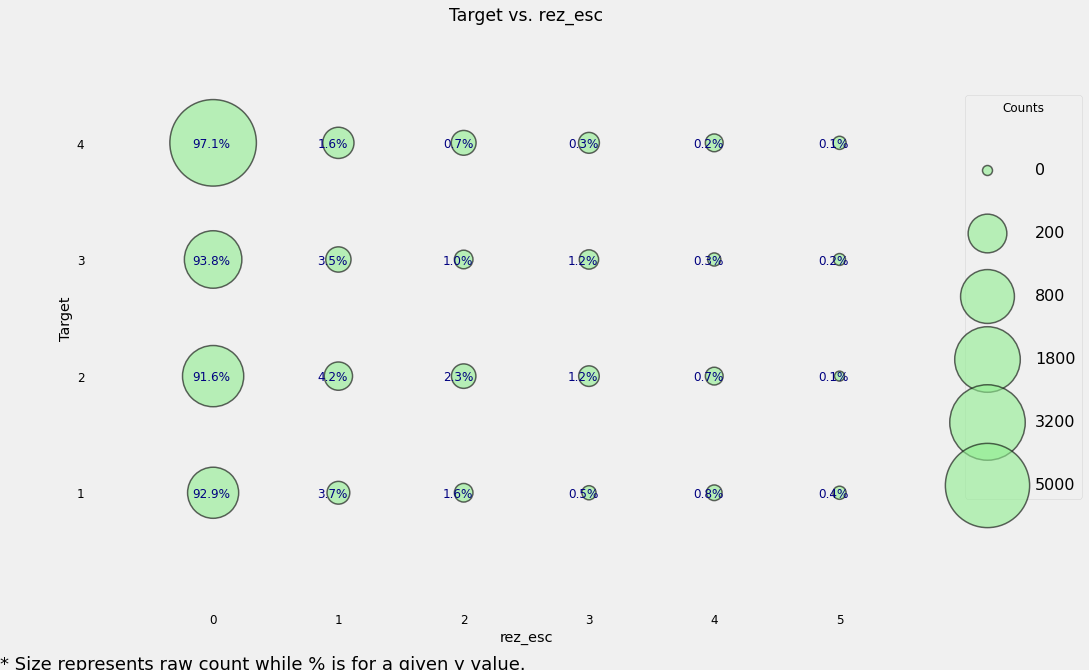

In [71]:
plot_categoricals('rez_esc', 'Target', data)

마커의 크기는 데이터의 개수를 나타냅니다. 이 플롯을 읽기 위해서는 주어진 y값을 선택하고 행 방향으로 이동하면서 살펴보면 됩니다. 예를 들어, 빈곤 수준이 1인 범주에서 93%, 약 800명의 개인은 전혀 뒤처지지 않았고, 0.4%, 약 50명의 개인이 5년 정도 뒤처졌습니다. 이 플롯은 전체 수와 범주 내 비율을 함께 보여주려고 했습니다.

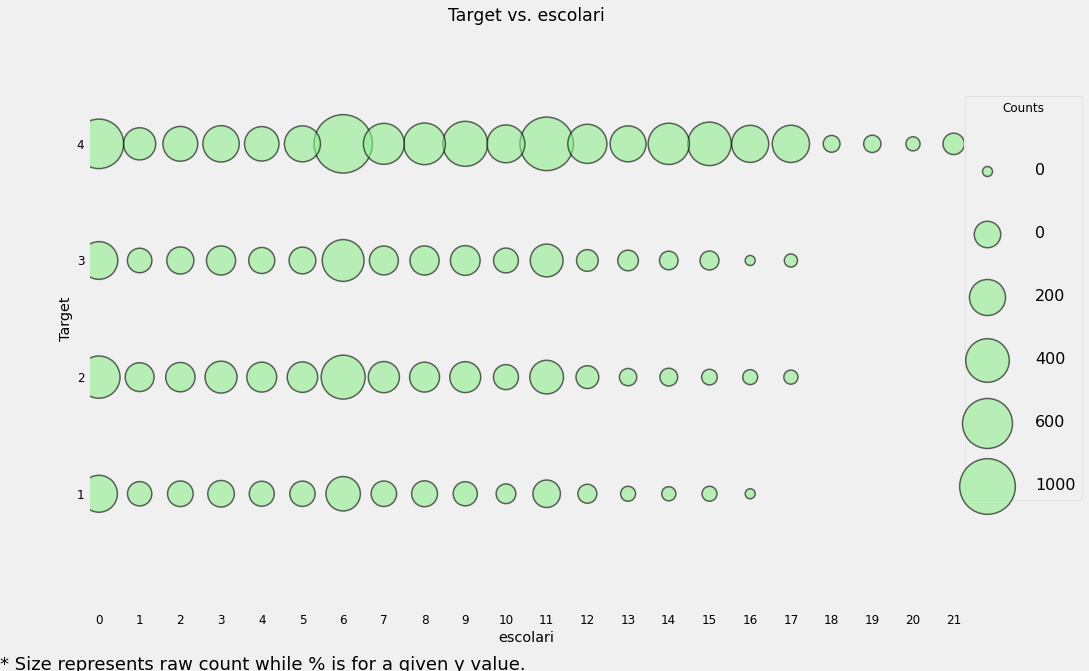

In [72]:
plot_categoricals('escolari', 'Target', data, annotate=False)

각 컬럼에 남아있는 나머지 결측값들은 ```Imputation```이라는 과정을 통해 채워집니다. 일반적으로 대체하는 방법에는 여러가지가 있지만, 컬럼의 ```중앙값```으로 결측값을 대체하는 방법을 가장 많이 사용합니다.  

이제 결측값에 관한 마지막 단계로, target의 각 값에 대해 결측값이 있는지 분포를 시각화할 수 있습니다.

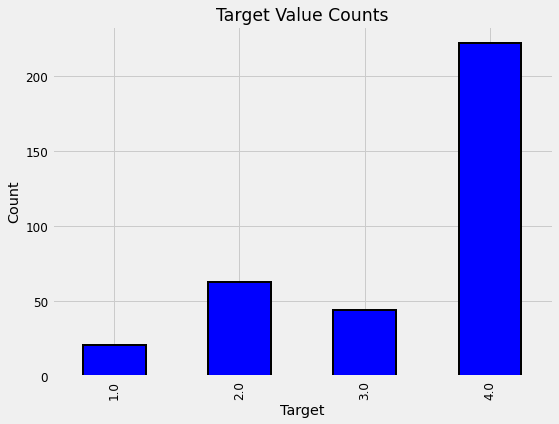

In [73]:
plot_value_counts(data[data['rez_esc-missing'] == 1], 'Target')

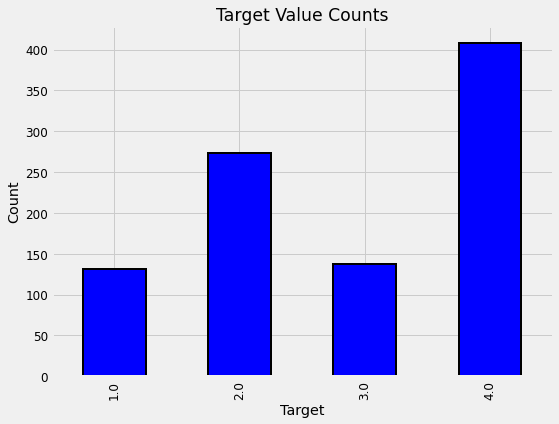

In [74]:
plot_value_counts(data[data['v2a1-missing'] == 1], 'Target')

때로 누락된 정보는 주어진 정보만큼 중요하기도 합니다.

### 3. Feature Engineering
우리가 할 수 있는 탐색적 데이터 분석이 더 남아있지만, 먼저 가정 수준에서 데이터를 통합하는 작업을 먼저 진행해야 합니다. 앞서 각 가정에 대한 정보들을 얻었지만, 훈련을 위해서는 각 가정에 대해 요약된 모든 정보를 얻어야 할 것입니다. 이것은 가정에 개인을 그룹화하고, 각각의 변수들에 대한 집계를 수행하는 것을 의미합니다.  

또다른 노트북에서, 자동화된 feature engineering을 어떻게 사용할 수 있는지를 보여주며, 이 자동화된 feature engineering은 머신러닝 워크플로우의 표준 부분이 되어야 합니다.

#### 3-1. Column Definitions
때때로 데이터 사이언스에서 우리는 손을 더럽혀서 데이터를 파헤치거나 오랜 시간동안 지루한 작업을 해야합니다. 이것은 분석의 일부이며, 우리는 데이터 설명을 사용하여 개인 수준과 가구 수준에 있는 열들을 정의해야 합니다. 데이터 설명에서 변수 자체를 검토하는 것 외에 가계 수준을 식별할 수 있는 다른 방법은 없습니다. 그러나 우리는 이미 되어 있는 것을 복사해서 붙여넣기만 하면 됩니다.  

일부 변수는 다른 방식으로 다뤄야 하므로 다른 변수들을 정의하겠습니다. 각 수준별로 변수들을 정의하고 나면, 필요에 따라 집계하는 작업을 시작할 수 있습니다.  

과정은 다음과 같습니다:  
1. 변수들을 가계 수준과 개인 수준으로 분리
2. 개인 수준의 데이터에 적합한 집계 방법 찾기
    * 순서형 변수에는 통계량 집계 가능
    * boolean 변수도 집계는 가능하지만 통계량이 적음
3. 개별 집계를 가계 수준 데이터에 조인

##### Define Variable Categories
몇가지 다양한 범주의 변수들이 있습니다:  

1. 개별 변수: 가정이라기 보다는 개인적 특성
    * boolean: Yes or No (1 or 0)
    * 순서형: 순서가 있는 정수형
2. 가계 변수
    * boolean: Yes or No
    * 순서형: 순서가 있는 정수형
    * 연속형
3. 제곱 변수: 데이터의 제곱 변수로부터 파생
4. Id 변수: 데이터를 식별하며 feature로 사용 불가  

아래에서 각 범주의 변수들을 직접 정의할 것입니다. 조금 지루하겠지만 필수적인 과정입니다.

In [75]:
id_ = ['Id', 'idhogar', 'Target']

In [76]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2',
            'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6',
            'estadocivil7', 'parentesco1', 'parentesco2',  'parentesco3',
            'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [77]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad', 'paredzinc',
           'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 'pisonatur',
           'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
           'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
           'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5',
           'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2',
           'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2',
           'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1',
           'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2',
           'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1',
              'r4t2', 'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [78]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

모든 변수를 다뤘고, 반복한 변수는 없는지 확인해보겠습니다.

In [79]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter
print('There are no repeats:', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable:', len(x) == data.shape[1])

There are no repeats: True
We covered every variable: True


### 3-2. Squared Variables
먼저, 가장 쉬운 단계인 제곱 변수를 제거하는 것부터 시작해보겠습니다. 때때로 변수는 feature engineering 과정에서 제곱하거나 변환되는 경우가 있는데, 이는 선형 모델이 비선형 관계를 학습하는데 도움이 될 수 있기 때문입니다. 그러나 우리는 더 복잡한 모형을 사용할 것이기 때문에 제곱 변수는 쓸모없습니다. 이러한 변수들은 제곱시키지 않은 원래의 변수와 높은 상관관계를 가지기 때문에 상관없는 정보를 추가함으로써 우리 모델이 망가지고 훈련 속도를 늦출 수 있습니다.  

```SQBage```와 ```age```를 비교하여 예로 들어보겠습니다.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


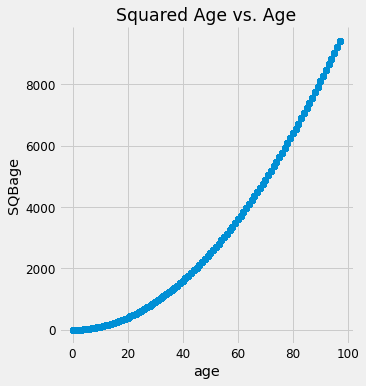

In [80]:
sns.lmplot('age', 'SQBage', data=data, fit_reg=False)
plt.title('Squared Age vs. Age')
plt.show()

두 변수는 매우 높은 상관관계를 가지고, 따라서 우리 데이터에 가지고 있을 필요가 없습니다.

In [81]:
# 제곱 변수 제거
data = data.drop(columns=sqr_)
data.shape

(33413, 136)

### 3-3. Id Variables
이 변수는 굉장히 간단합니다. 식별하는데 필요한 자료이기 때문에 그대로 데이터에 유지할 것입니다.

### 3-4. Household Level Variables
가장에 대해 집합을 만들고 가계 수준의 변수들로 부분집합을 만들어 보겠습니다. 

In [82]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

가계 수준의 변수 대부분은 그냥 그대로 둘 수 있습니다. 각 가정에 대한 예측을 만들기 위해서 우리는 이 변수들을 feature로 사용합니다. 그러나 불필요한 변수들을 지우고 현재의 데이터로부터 몇 가지 feature들을 추가할 수 있습니다.

##### Redundant Household Variables
모든 가정 관련 변수들 사이의 상관관계를 살펴봅시다. 상관관계가 너무 높은 경우에는 그중 하나의 변수를 지워야 할 것입니다.  

다음 코드는 상관계수의 절댓값이 0.95 이상인 변수들을 식별하는 내용입니다.

In [98]:
# 상관분석 매트릭스 생성
corr_matrix = heads.corr()

# 매트릭스의 위쪽 삼각형
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관관계가 0.95보다 큰 컬럼 인덱스
to_drop = [col for col in upper.columns if any(abs(upper[col]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

이것은 관계있는 변수 각 쌍 중 하나를 보여줍니다. 다른 쌍을 보기 위해서는 ```corr_matrix```로 부분집합을 만들 수 있습니다.

In [100]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


<AxesSubplot:>

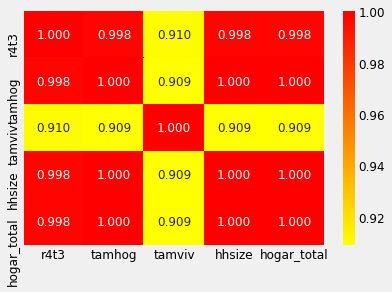

In [103]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap=plt.cm.autumn_r, fmt='.3f')

집의 크기와 관련된 몇 가지 변수들이 있습니다:
* ```r4t3```: 가족 구성원 수
* ```tamhog```: 가정의 규모
* ```tamviv```: 한 가정에 사는 사람 수
* ```hhsize```: 가정의 규모
* ```hogar_total```: 가정 내 개인의 총 수  

이 변수들은 모두 높은 상관관계를 가집니다. 사실, ```hhsize```는 ```tamhog``` 및 ```hogar_total```과 완벽한 상관관계를 가집니다. 불필요한 정보이기 때문에 두 변수를 지울 것입니다. 또한 ```hhsize```와 완벽한 상관관계를 가지는 ```r4t3```또한 제거할 수 있습니다.  

```tamviv```는 ```hhsize```와 완전히 일치하지는 않는데, 이는 가족 구성원 중 한 가정에 살지 않는 사람이 있기 때문일 것입니다. 그 차이를 산점도로 시각화해봅시다.

In [104]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Household size vs. number of persons living in the household')

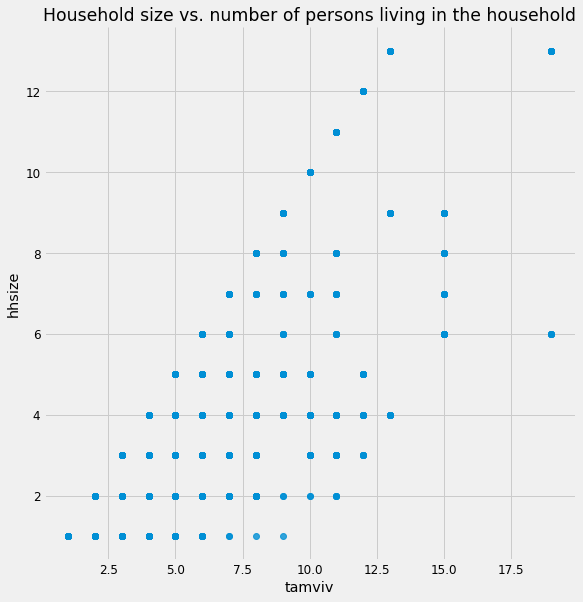

In [107]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size=8)
plt.title('Household size vs. number of persons living in the household')

많은 사례들을 보면, 가족 수보다 더 많은 사람들이 한 가정에 살고 있음을 볼 수 있습니다. 이것은 두 측정방법의 차이를 다룬 새로운 변수에 대한 아이디어를 줍니다.  

새로운 변수를 만들어 보겠습니다.

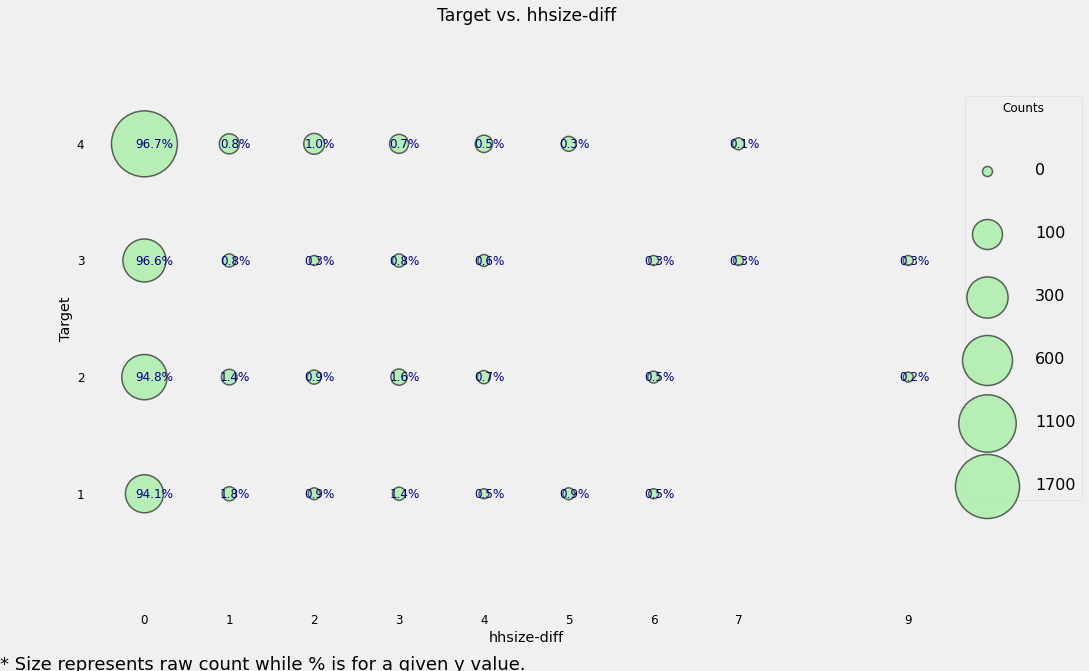

In [108]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

대부분의 가정들이 차이가 없지만, 몇몇의 경우 가족 구성원 수보다 더 많은 사람이 한 가정에 살고 있습니다.  

이제, 다른 불필요한 변수들에 대해 살펴봅시다. 먼저 ```coopele``` 변수를 살펴보겠습니다.

In [110]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


이 변수들은 가정의 전기가 어디에서 오는지를 나타냅니다. 네 가지 옵션이 있으며, 이 두 가지 옵션 중 하나를 가지고 있지 않은 가정은 전기가 없거나(```noelec```) 전용 플랜트(```planpri```)에서 전기를 공급받습니다.

##### Creating Ordinal Variable
네 가지 변수를 하나의 순서형 변수로 나타내고자 합니다. 데이터 설명을 근거로 매핑해보겠습니다.
> 0: No electricity  
1: Electricity from cooperative  
2: Electricity from CNFL, ICA, ESPH/JASEC  
3: Electricity from private plant  

순서형 변수에는 고유한 순서가 있으며, 이를 위해 도메인 지식을 바탕으로 순서를 선택해야 합니다. 새로운 순서형 변수를 만든 후 나머지 네 개는 제거합니다. 여기에는 변수가 없는 가구가 여러 개 있으므로 ```nan```을 사용하고 이 변수에 대해 측정값이 없음을 나타내는 boolean 컬럼을 추가할 것입니다.

In [111]:
elec = []

# 값 할당
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

# 새로운 변수와 결측값 플래그 생성
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# 전기 관련 컬럼 제거
# heads = heads.drop(columns=['noelec', 'coopele', 'public', 'planpri'])

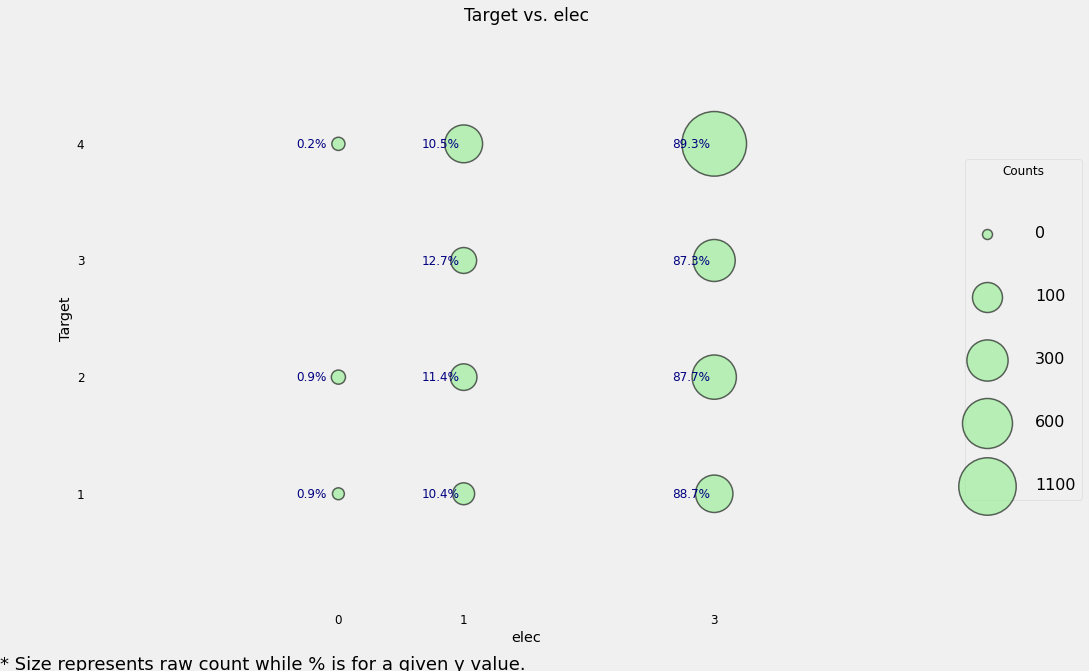

In [112]:
plot_categoricals('elec', 'Target', heads)